# Matplotlib

## Funcional approach

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.arange(11)
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [4]:
y = x**2
y

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100])

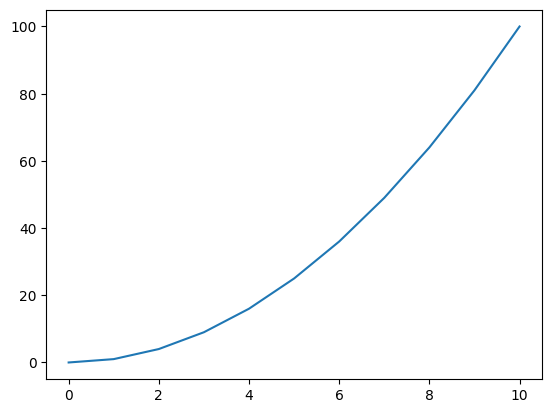

In [5]:
plt.plot(x,y)
plt.show()

##### If you are working in a Jupyter Notebook, you need to use the magic command %matplotlib inline to display plots directly in the notebook. This is not necessary when working with other Python environments like VS Code.

### Plot personalization

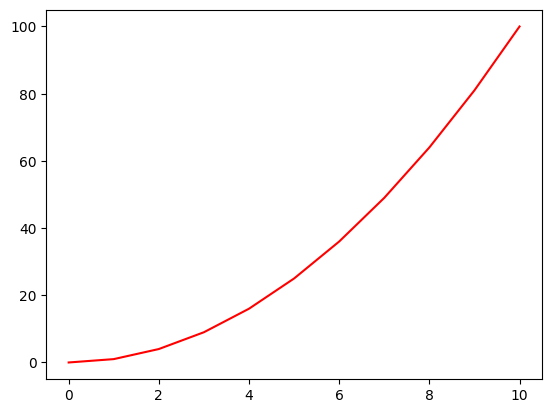

In [6]:
plt.plot(x,y,color='red')

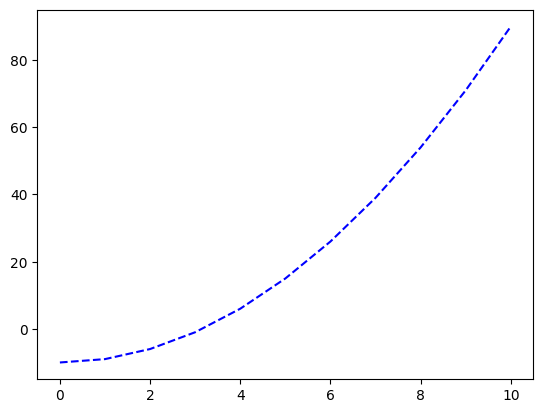

In [8]:
plt.plot(x,y - 10, color='blue',ls='dashed')

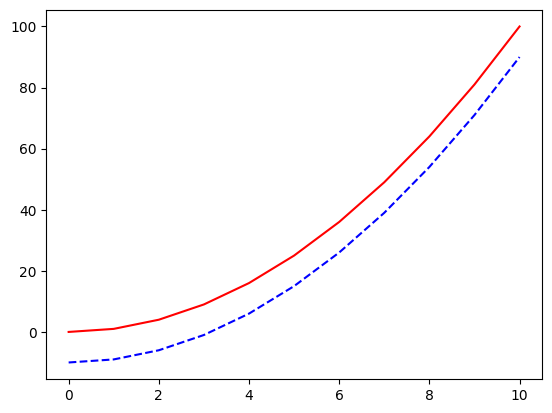

In [9]:
plt.plot(x,y,color='red')
plt.plot(x,y - 10, color='blue',ls='dashed')

Text(0.5, 1.0, 'Plot Title')

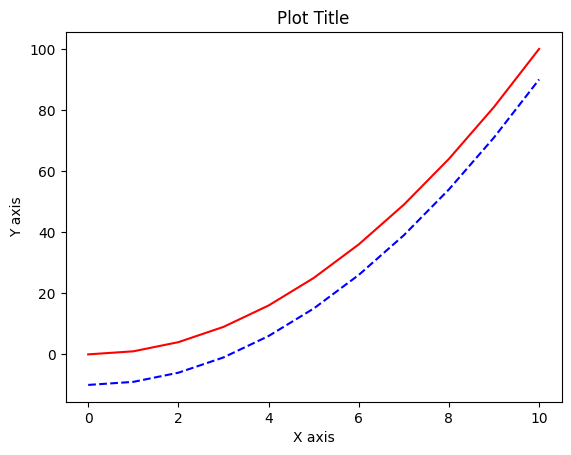

In [10]:
plt.plot(x,y,color='red')
plt.plot(x,y - 10, color='blue',ls='dashed')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')

We used:

- color: To change the color of the lines.
- linestyle: To set the line as solid or dashed (ls='dashed').

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

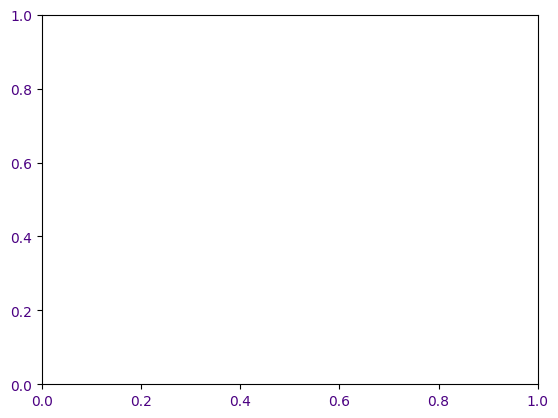

In [12]:
plt.xticks(color='indigo')
plt.yticks(color='indigo')

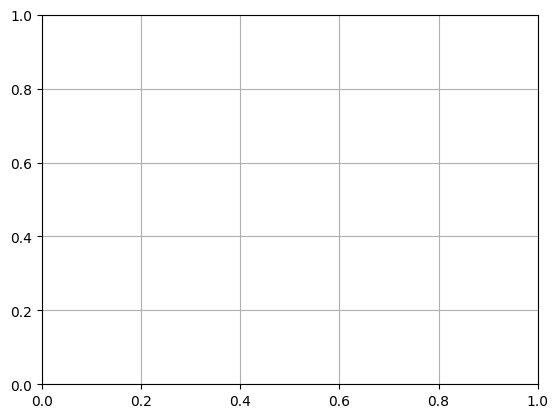

In [13]:
plt.grid()

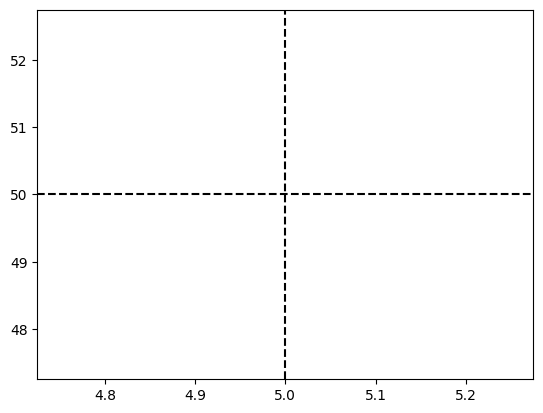

In [14]:
plt.axhline(y=50, color='k', linestyle='--')
plt.axvline(x=5, color='k', linestyle='--')

Here:
- plt.xticks() and plt.yticks() are used to change the color of tick marks.
- plt.grid() adds grid lines to the plot.
- axhline() and axvline() help add horizontal and vertical reference lines.

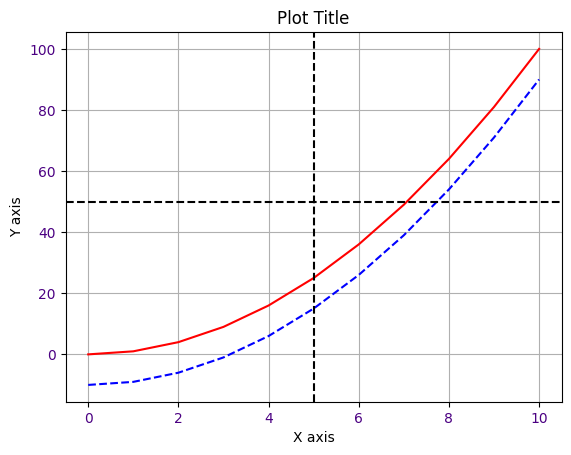

In [15]:
plt.plot(x,y,color='red')
plt.plot(x,y - 10, color='blue',ls='dashed')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Plot Title')
plt.xticks(color='indigo')
plt.yticks(color='indigo')
plt.grid()
plt.axhline(y=50, color='k', linestyle='--')
plt.axvline(x=5, color='k', linestyle='--')
plt.show()

Subplots:

- Create multiple charts on a single canvas using plt.subplot().

<Axes: >

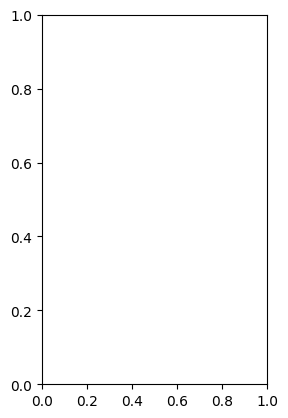

In [17]:
plt.subplot(1,2,1)

- plt.subplot(1, 2, 1) means one row and two columns of plots, and we’re currently working on the first plot.
- plt.subplot(1, 2, 2) moves to the second plot.

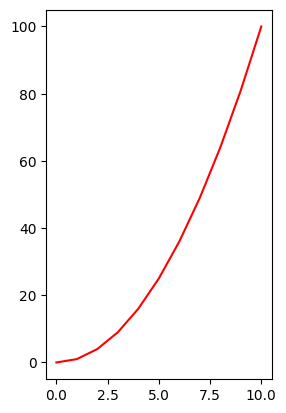

In [18]:
plt.subplot(1,2,1)
plt.plot(x,y, color='red')

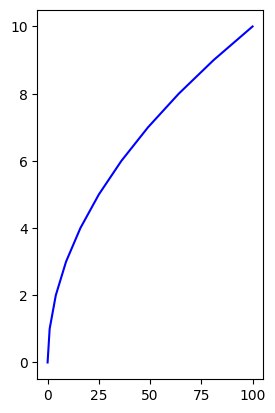

In [19]:
plt.subplot(1,2,2)
plt.plot(y,x,color='blue')

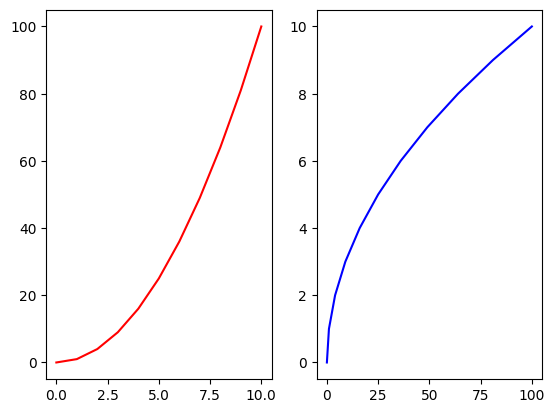

In [20]:
plt.subplot(1,2,1)
plt.plot(x,y,color='red')

plt.subplot(1,2,2)
plt.plot(y,x,color='blue')

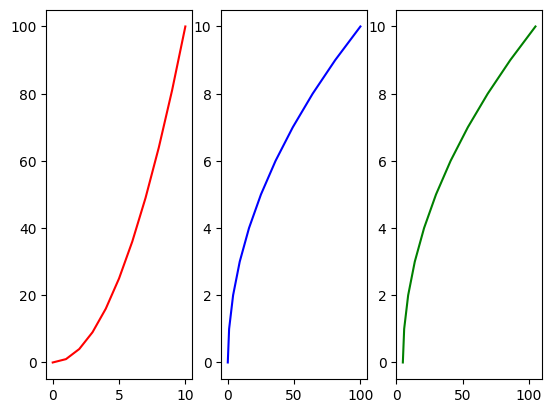

In [21]:
plt.subplot(1,3,1)
plt.plot(x,y,color='red')

plt.subplot(1,3,2)
plt.plot(y,x,color='blue')

plt.subplot(1,3,3)
plt.plot(y+5,x,color='green')

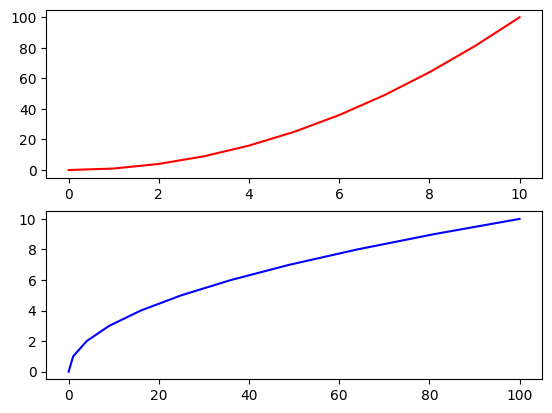

In [23]:
plt.subplot(2,1,1)
plt.plot(x,y,color='red')

plt.subplot(2,1,2)
plt.plot(y,x,color='blue')

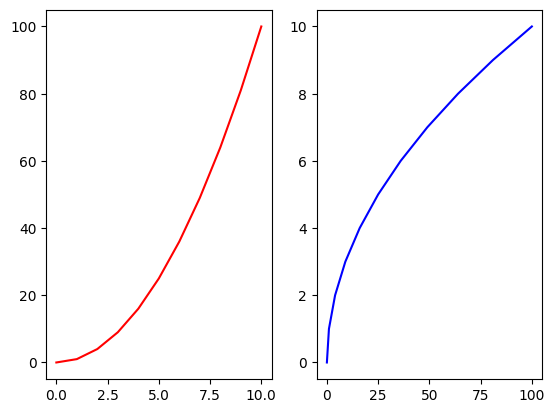

In [24]:
# Back to original subplot
plt.subplot(1,2,1)
plt.plot(x,y,color='red')
plt.subplot(1,2,2)
plt.plot(y,x,color='blue')

### Special Shapes - Koch Snowflake:

- More complex example using recursion to create a snowflake shape called the Koch Snowflake.
- The fill() function is used to fill the area between points.
- plt.fill() fills the interior of the shape.
- plt.axis('equal') ensures the scaling of the x and y axes is the same.

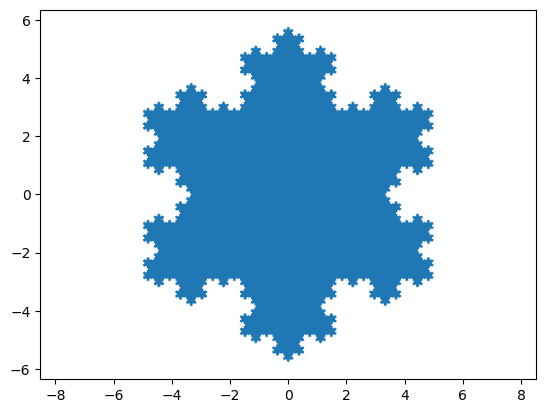

In [25]:
def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.
    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:

            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        
        else:

            ZR = 0.5 - 0.5j * np.sqrt(3) / 3
            p1 = _koch_snowflake_complex(order - 1) # start points
            p2 = np.roll(p1, shift = -1) # end points
            dp = p2 - p1 # connection vectors
            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            new_points[1::4] = p1 + dp / 3
            new_points[2::4] = p1 + dp * ZR
            new_points[3::4] = p1 + dp / 3 * 2

            return new_points
        
    points = _koch_snowflake_complex(order)
    x, y = points.real, points.imag
    return x, y

x, y = koch_snowflake(order=5)
plt.fill(x, y)
plt.axis('equal')
plt.show()


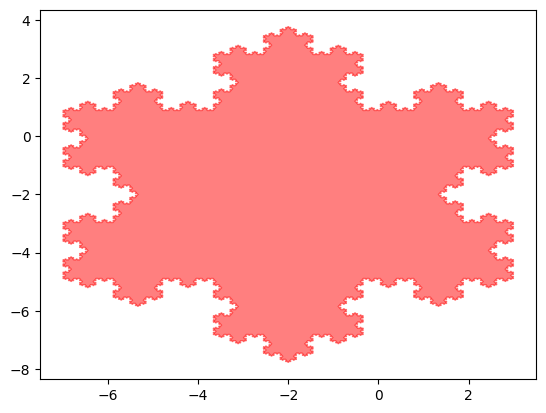

In [28]:
plt.fill(x-2, y-2, color='red', alpha=0.5)

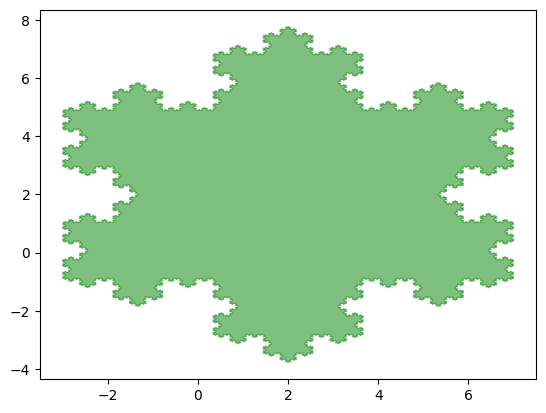

In [29]:
plt.fill(x+2, y+2, color='green', alpha=0.5)

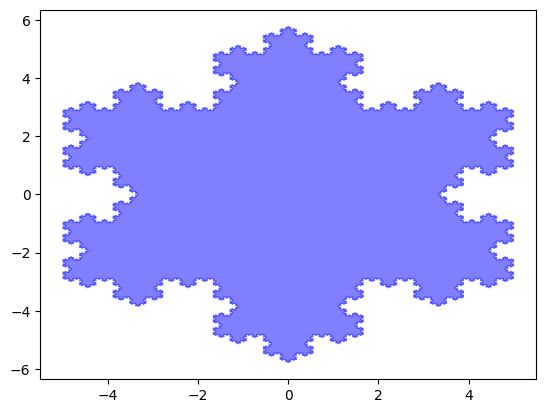

In [30]:
plt.fill(x, y, color='blue', alpha=0.5)

(np.float64(-0.05500000000000001),
 np.float64(0.05500000000000001),
 np.float64(-0.05500000000000001),
 np.float64(0.05500000000000001))

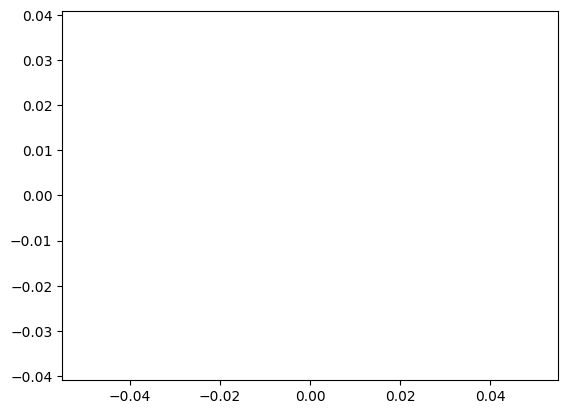

In [31]:
plt.axis('equal')

#### Complete plot:

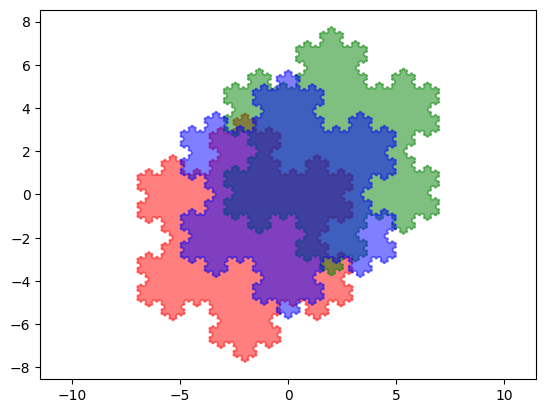

In [33]:
plt.fill(x-2, y-2, color='red', alpha=0.5)
plt.fill(x+2, y+2, color='green', alpha=0.5)
plt.fill(x, y, color='blue', alpha=0.5)
plt.axis('equal')
plt.show()

### Scatter Plots:

- To visualize points, we can use plt.scatter().
- We generate random values for this purpose.
- plt.scatter() is used for scatter plots, and we can customize which points are highlighted.

Chcąc zaprezentować możliwości wykresu punktowego, stwórzmy macierz o kształcie (1000,2) wypełnioną losowymi wartościami.

In [35]:
rand_arr = np.random.randint(1,1000,2000)
rand_arr

array([969, 957, 159, ..., 671, 854, 281])

In [37]:
rand_arr = np.random.randint(1,1000,2000).reshape(1000,2)
rand_arr

array([[353, 746],
       [802, 483],
       [990, 563],
       ...,
       [461, 802],
       [751, 847],
       [316, 554]])

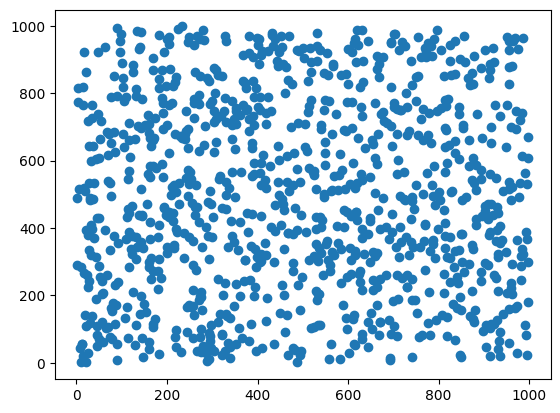

In [38]:
plt.scatter(rand_arr[:,0], rand_arr[:,1])

### Color sequence:

In [39]:
cmap = np.empty(rand_arr.shape, dtype='object')
cmap

array([[None, None],
       [None, None],
       [None, None],
       ...,
       [None, None],
       [None, None],
       [None, None]], dtype=object)

In [41]:
cmap[:] = 'blue'
cmap[:]

array([['blue', 'blue'],
       ['blue', 'blue'],
       ['blue', 'blue'],
       ...,
       ['blue', 'blue'],
       ['blue', 'blue'],
       ['blue', 'blue']], dtype=object)

In [42]:
cmap[rand_arr.min(axis=1)>500] = 'red'
cmap

array([['blue', 'blue'],
       ['blue', 'blue'],
       ['red', 'red'],
       ...,
       ['blue', 'blue'],
       ['red', 'red'],
       ['blue', 'blue']], dtype=object)

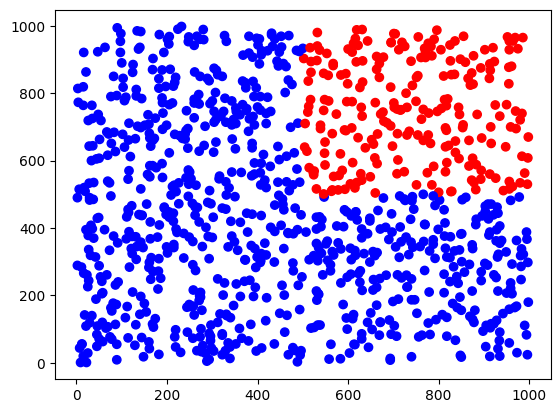

In [43]:
plt.scatter(rand_arr[:,0],rand_arr[:,1],c=cmap[:,0])

In [44]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

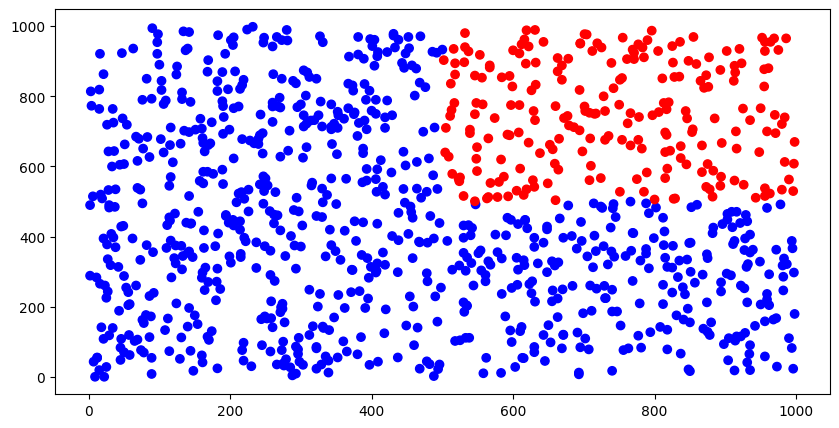

In [45]:
plt.figure(figsize=(10,5))
plt.scatter(rand_arr[:,0],rand_arr[:,1],c=cmap[:,0])

### Pie plot:
- plt.pie()

In [46]:
pie_data = np.array([30,20,20,40,10])
pie_data

array([30, 20, 20, 40, 10])

In [47]:
labels = ['A','B','C','D','E']

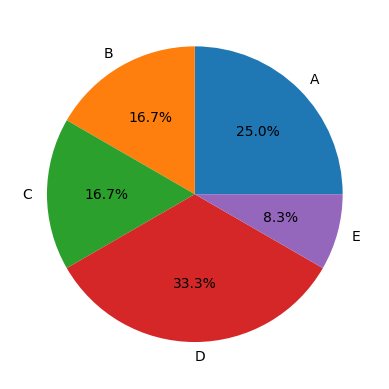

In [48]:
plt.pie(pie_data,labels=labels,autopct='%1.1f%%')
plt.show()

Uzupełniliśmy dodatkowo parametr autopct, aby wykres zawierał udział procentowy każdej pozycji.